<a href="https://colab.research.google.com/github/jainaryan644/MAT-422/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 2.3

2.3.1 Joint probability distributions

Joint probability distributions describes probability of 2+ random events occurring together.

1. Discrete Random Variables
Joint probability mass function:
∑∑ = p(X =x, Y=y) =1
x y

2. Continuous Random Variables
Joint probability density function:
∑-∞^∞ ∑-∞^∞ fX,Y (x,y)dxdy = 1

3. Marginal Distribution of X is obtained by summing out the other variable Y

4. Conditional Probability:
discrete:
P(X=x|Y=y) = P(X=x, Y=y) / P(y=y)

continuous: fX|Y = fX,Y(x,y) / fY(y)

5. Independence:
discrete: P(X=x, Y=y) =
P(X =x) * P(Y=y)

continuous: fX,Y = fX(x) * fY(y)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

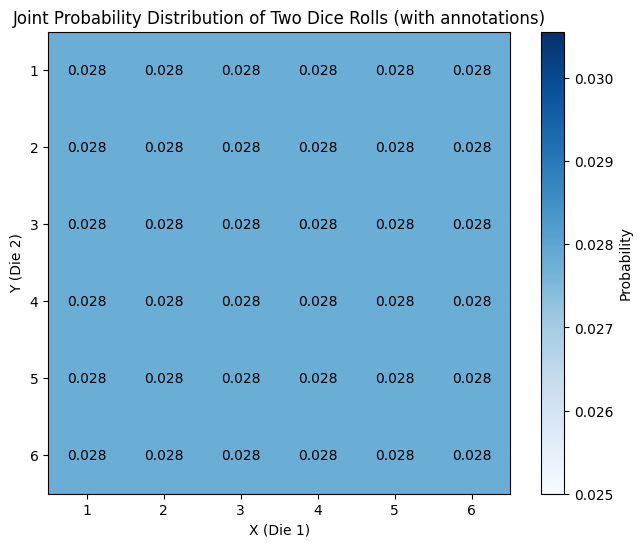

In [4]:
#Discrete Joint Probability (Rolling 2 dice)

X_values = np.arange(1, 7)
Y_values = np.arange(1, 7)

joint_prob = np.full((6, 6), 1/36)

def plot_joint_probability_with_annotations(X, Y, joint_prob):
    plt.figure(figsize=(8, 6))
    heatmap = plt.imshow(joint_prob, cmap='Blues', origin='upper')

    plt.colorbar(label='Probability')

    for i in range(len(X)):
        for j in range(len(Y)):
            plt.text(j, i, f'{joint_prob[i, j]:.3f}', ha='center', va='center', color='black')

    plt.xticks(ticks=np.arange(len(X)), labels=X)
    plt.yticks(ticks=np.arange(len(Y)), labels=Y)
    plt.grid(which='minor', color='black', linestyle='-', linewidth=1)

    plt.title("Joint Probability Distribution of Two Dice Rolls (with annotations)")
    plt.xlabel("X (Die 1)")
    plt.ylabel("Y (Die 2)")
    plt.show()

plot_joint_probability_with_annotations(X_values, Y_values, joint_prob)


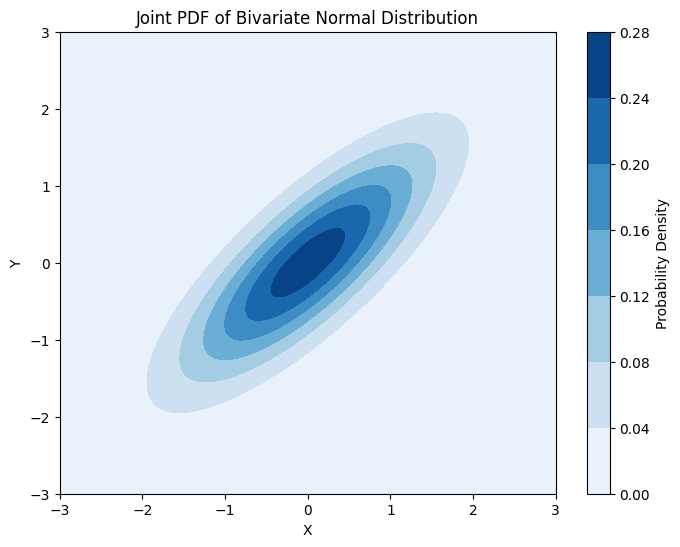

In [6]:
#Continuous Joint Probability


mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

pos = np.dstack((X, Y))
joint_pdf = multivariate_normal(mean, cov).pdf(pos)

def plot_joint_pdf(X, Y, joint_pdf):
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, joint_pdf, cmap='Blues')
    plt.colorbar(label='Probability Density')
    plt.title("Joint PDF of Bivariate Normal Distribution")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

plot_joint_pdf(X, Y, joint_pdf)


2.3.2. Correlation and dependence

Correlation: measure to describe strength and direction of linear relationship

1. Covariance indicates the direction of the relationship, where 0 covariance indicates no relationship between X and Y
Cov(X,Y) = E([X-E(X))(Y-E(Y))])

2. Correlation coefficient normalizes covariance.

ρX,Y = Cov(X,Y) / σXσY

Dependence: any relationship between 2+ random variables where one variable gives information about another

Types:
1. Deterministic: one var determines value of another
2. Statistical: Some type of association even if not perfectly related



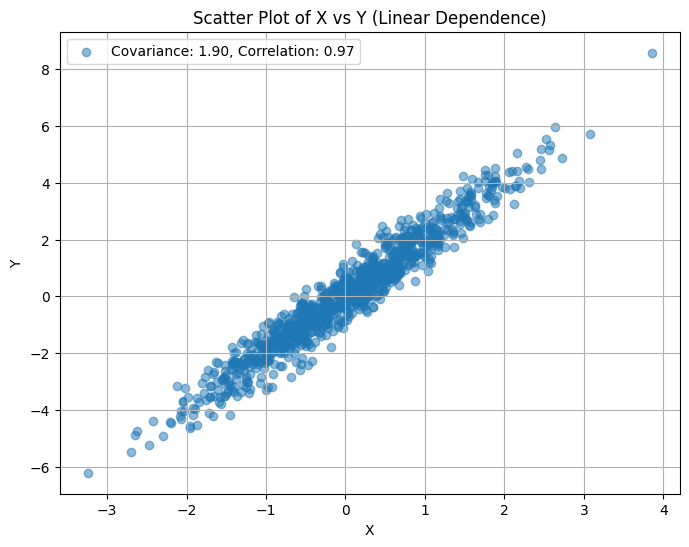

In [7]:
#Linear correlation/dependence


def generate_data():
    np.random.seed(42)
    X = np.random.normal(0, 1, 1000)
    Y = 2 * X + np.random.normal(0, 0.5, 1000)
    return X, Y

def calculate_covariance_correlation(X, Y):
    covariance = np.cov(X, Y)[0, 1]

    correlation = np.corrcoef(X, Y)[0, 1]

    return covariance, correlation

def plot_scatter(X, Y, covariance, correlation):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, alpha=0.5, label=f'Covariance: {covariance:.2f}, Correlation: {correlation:.2f}')
    plt.title('Scatter Plot of X vs Y (Linear Dependence)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    X, Y = generate_data()
    covariance, correlation = calculate_covariance_correlation(X, Y)
    plot_scatter(X, Y, covariance, correlation)

main()


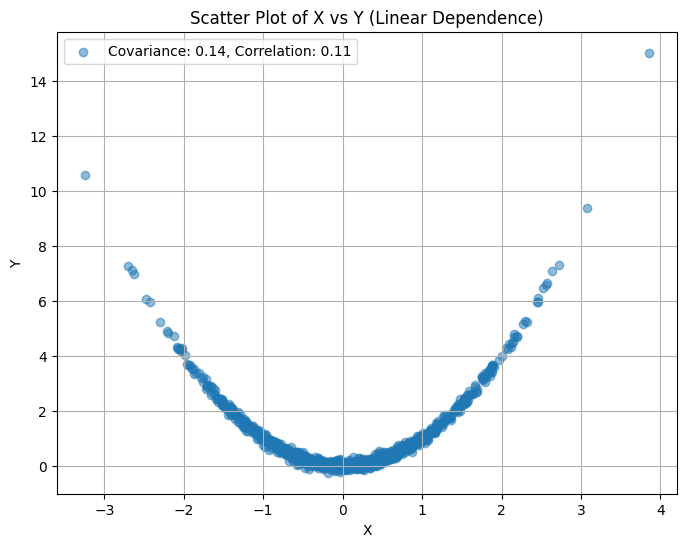

In [8]:
#Nonlinear dependence
def generate_nonlinear_data():
    np.random.seed(42)
    X = np.random.normal(0, 1, 1000)
    Y = X**2 + np.random.normal(0, 0.1, 1000)
    return X, Y

def main_nonlinear():
    X, Y = generate_nonlinear_data()
    covariance, correlation = calculate_covariance_correlation(X, Y)
    plot_scatter(X, Y, covariance, correlation)

main_nonlinear()


2.3.3. Random samples

Random samples are set of observations or data points drawn from a population

concepts:
1. Population: entire set of possible outcomes
2. Sample: subset of population selected to make inferences about the population
3. random sample: subset of data points randomly selected from pop.
4. independence: the selection of one sample does not affect the others
5. distributions: random samples can be drawn from different probability distributions like normal, uniform, exponential

Applications:
1. estimating population parameters
2. hypothesis testing

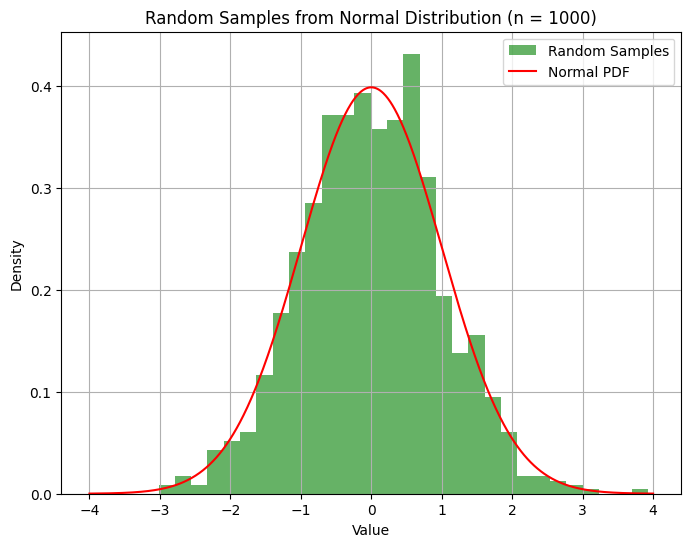

Sample Mean: 0.005834214556024074
Sample Variance: 0.9662151406949787


In [9]:
#normal distribution

def random_samples_normal(n_samples=1000, mu=0, sigma=1):
    samples = np.random.normal(mu, sigma, n_samples)

    sample_mean = np.mean(samples)
    sample_variance = np.var(samples)

    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Random Samples')

    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    plt.plot(x, pdf, color='red', label='Normal PDF')

    plt.title(f'Random Samples from Normal Distribution (n = {n_samples})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    return sample_mean, sample_variance

mean, variance = random_samples_normal(n_samples=1000, mu=0, sigma=1)
print(f"Sample Mean: {mean}")
print(f"Sample Variance: {variance}")


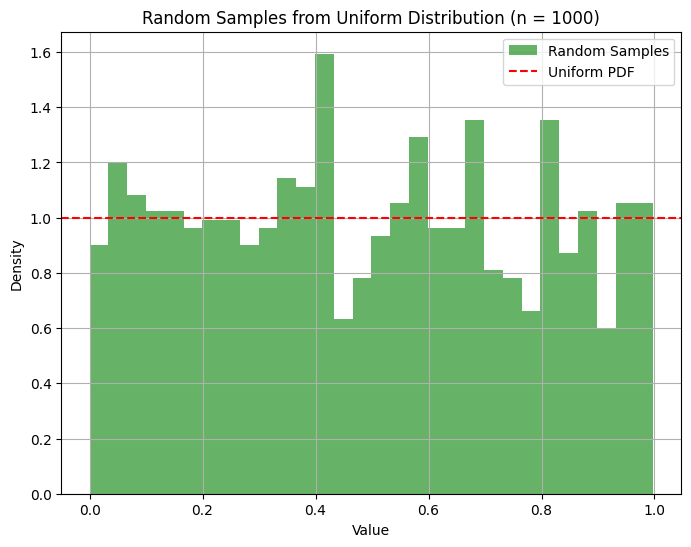

Sample Mean: 0.490369440902993
Sample Variance: 0.08183970935100468


In [10]:
#uniform distribution
def random_samples_uniform(n_samples=1000, a=0, b=1):
    samples = np.random.uniform(a, b, n_samples)

    sample_mean = np.mean(samples)
    sample_variance = np.var(samples)

    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Random Samples')

    plt.axhline(y=1/(b-a), color='red', label='Uniform PDF', linestyle='--')

    plt.title(f'Random Samples from Uniform Distribution (n = {n_samples})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    return sample_mean, sample_variance

mean, variance = random_samples_uniform(n_samples=1000, a=0, b=1)
print(f"Sample Mean: {mean}")
print(f"Sample Variance: {variance}")


In [11]:
#sampling from dataset

def random_sample_from_dataset(dataset, n_samples=10):
    sample = np.random.choice(dataset, n_samples, replace=False)

    sample_mean = np.mean(sample)
    sample_variance = np.var(sample)

    print(f"Sample: {sample}")
    print(f"Sample Mean: {sample_mean}")
    print(f"Sample Variance: {sample_variance}")

dataset = [160, 170, 175, 180, 165, 155, 190, 185, 178, 172, 168, 160]

random_sample_from_dataset(dataset, n_samples=5)


Sample: [168 178 160 172 190]
Sample Mean: 173.6
Sample Variance: 101.44000000000001
